In [1]:
import pandas as pd
import numpy as np

In [2]:
Source= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [3]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [4]:
dataframe = pd.read_csv(Source, names=names)

In [5]:
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataframe.isnull().any().any()

False

In [8]:
dataframe.isnull().sum().sum()

0

In [35]:
font_color = '#e8e8e8'
hfont = {'fontname':'Calibri'}
facecolor = '#d4d4d4'

<AxesSubplot:>

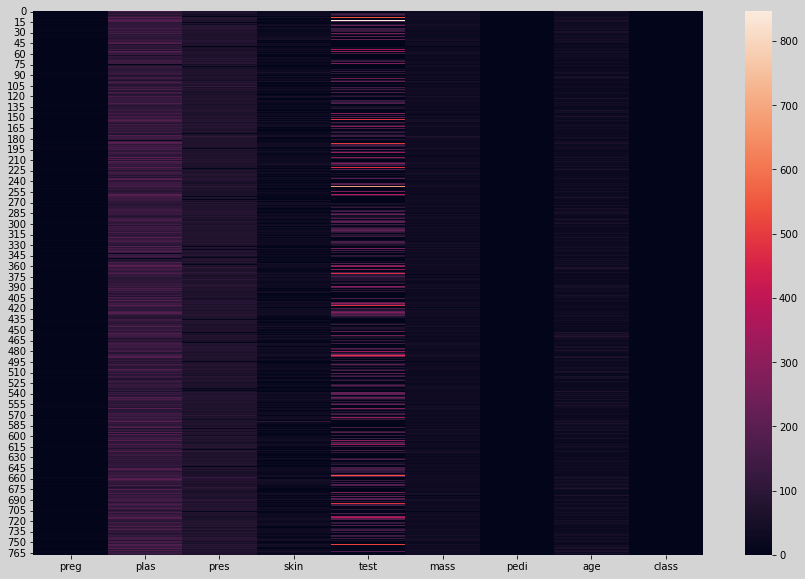

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 10), facecolor=facecolor)
sns.heatmap(dataframe)

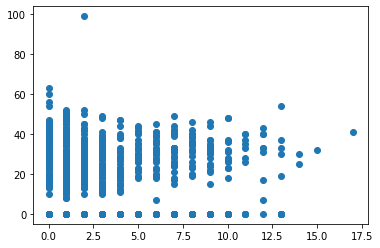

In [29]:
a=dataframe[['preg']]
b=dataframe[['skin']]
plt.scatter(a,b)

NameError: name 'barplot' is not defined

In [9]:
x = dataframe[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'age']]
y = dataframe[['diagnosis']]

In [10]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [11]:
def loss(y, y_pred):
    loss = -np.mean(y*(np.log(y_pred)) - (1-y)*np.log(1-y_pred))
    return loss

In [12]:
def gradients(x, y, y_pred):
    m = x.shape[0]
    dw = (1/m)*np.dot(x.T, (y_pred - y))
    db = (1/m)*np.sum((y_pred - y)) 
    
    return dw, db

In [13]:
def plot_decision_boundary(x, w, b):
    x1 = [min(x[:,0]), max(x[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "g^")
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [14]:
def normalize(x):
    m, n = x.shape
    for i in range(n):
        x = (x - x.mean(axis=0))/x.std(axis=0)
        
    return x


In [15]:
def train(x, y, bs, epochs, lr): 
    m, n = x.shape
    w = np.zeros((n,1))
    b = 0
    y = y.reshape(m,1)
    x = normalize(x)
    losses = []
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]
            y_pred = sigmoid(np.dot(xb, w) + b)
            dw, db = gradients(xb, yb, y_pred)
            w -= lr*dw
            b -= lr*db
        l = loss(y, sigmoid(np.dot(x, w) + b))
        losses.append(l)
    return w, b, losses

In [16]:
def predict(x):
    x = normalize(x)
    preds = sigmoid(np.dot(x, w) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)